#Import Dependency

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import scipy.spatial
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


#Methods

##FKNN

In [ ]:
import scipy.spatial
from collections import Counter
from operator import itemgetter

class FKNN:
    def __init__(self, k):
      self.k = k
        
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def getDistance(self, X1, X2):
      return scipy.spatial.distance.euclidean(X1, X2)

    def fuzzy(self, d, m):
      closestPoint = [ d[k][1] for k in range(len(d))]
      classes = np.unique(self.y_train[closestPoint])
      arrMembership = []
      for cls in classes:
        atas = 0
        bawah = 0
        for close in d: 
          if(close[0] != 0):
            if(cls == self.y_train[close[1]]):
              atas += np.power((1/close[0]), (2/(m-1)))
            else:
              atas += np.power((0/close[0]), (2/(m-1)))
            bawah +=  np.power((1/close[0]), (2/(m-1)))
          else:
            atas  += 0
            bawah  += 1
        arrMembership.append([atas/bawah, cls])
      return arrMembership

    def predict(self, X_test):
      final_output = []
      for i in range(len(X_test)):
          d = []
          votes = []
          for j in range(len(X_train)):
              dist = self.getDistance(X_train[j] , X_test[i])
              d.append([dist, j])
          d.sort()
          d = d[0:self.k]
          membership = self.fuzzy(d, 2)
          predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
          final_output.append(predicted_class[0][1])    
      return final_output
    
    def score(self, X_test, y_test):
      predictions = self.predict(X_test)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

##FKNCN

In [ ]:
import scipy.spatial
from collections import Counter
from operator import itemgetter

class FKNCN:
    def __init__(self, k):
      self.k = k
        
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def getDistance(self, X1, X2):
      return scipy.spatial.distance.euclidean(X1, X2)

    def getFirstDistance(self, X_train, X_test):
      distance = []
      for i in range(len(X_train)):
        dist = scipy.spatial.distance.euclidean(X_train[i] , X_test)
        distance.append([i, dist, self.y_train[i]])
      return distance
  
    def getCentroid(self, arrData):
      result=[]
      dataTran = np.array(arrData).T
      for i in range(len(dataTran)):
        result.append(np.mean(dataTran[i]))
      return result

    def kncn(self, X_test):
      myclass = list(set(self.y_train))
      closestPoint = []
      anothersPoint = []
      for indexK in range(0, self.k):
        if(indexK == 0):
          distance = self.getFirstDistance(self.X_train, X_test)   
          distance_sorted = sorted(distance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0])
          distance_sorted.pop(0)
          for anothers in (distance_sorted):
            anothersPoint.append(anothers[0])  
        else:
          arrDistance = []
          closestPointTemp = [self.X_train[r[0]] for r in closestPoint]
          for r in (anothersPoint):
            arrQ = closestPointTemp.copy()
            arrQ.append(self.X_train[r])
            arrDistance.append([r, self.getDistance(self.getCentroid(arrQ), X_test)])
          distance_sorted = sorted(arrDistance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0])
          # anothersPoint = np.setdiff1d(anothersPoint, closestPoint)
      return closestPoint

    def fuzzy(self, d, m):
      closestPoint = [ d[k][1] for k in range(len(d))]
      classes = np.unique(self.y_train[closestPoint])
      arrMembership = []
      for cls in classes:
        atas = 0
        bawah = 0
        for close in d: 
          if(close[0] != 0):
            if(cls == self.y_train[close[1]]):
              atas += np.power((1/close[0]), (2/(m-1)))
            else:
              atas += np.power((0/close[0]), (2/(m-1)))
            bawah +=  np.power((1/close[0]), (2/(m-1)))
          else:
            atas  += 0
            bawah  += 1
        arrMembership.append([atas/bawah, cls])
      return arrMembership

    def predict(self, X_test):
      final_output = []
      for i in range(len(X_test)):
        closestPoint = self.kncn(X_test[i])
        d = []
        votes = []
        for j in range(len(X_train)):
            dist = self.getDistance(X_train[j] , X_test[i])
            d.append([dist, j])
        d.sort()

        d = d[0:self.k]
        membership = self.fuzzy(d, 2)
        predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
        final_output.append(predicted_class[0][1])    
      return final_output
    
    def score(self, X_test, y_test):
      predictions = self.predict(X_test)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

##BM-FKNN

In [ ]:
import scipy.spatial
from collections import Counter
from operator import itemgetter

class BM_FKNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def getDistance(self, X1, X2):
        return scipy.spatial.distance.euclidean(X1, X2)

    def getFirstDistance(self, X_train, X_test):
      distance = []
      for i in range(len(X_train)):
        dist = scipy.spatial.distance.euclidean(X_train[i] , X_test)
        distance.append([i, dist, self.y_train[i]])
      return distance
      
    def nearestPoint(self, X_test):
      allPoint = [ i for i in range(len(X_test))]
      distance = self.getFirstDistance(self.X_train, X_test)   
      distance_sorted = sorted(distance, key=itemgetter(1))
      closest = distance_sorted[0:self.k]
      closestPoint = [ i[0] for i in closest]
      anothersPoint = np.setdiff1d(allPoint, closestPoint)
      return closestPoint, anothersPoint

    def bonferroniMean(self, c, closestPoint, p, q): 
      arrInner = [self.X_train[e] for e in closestPoint if(self.y_train[e] != c)] # j bukan angggota i 
      arrOuter = [self.X_train[q] for q in closestPoint if(self.y_train[q] == c)]
      n = len(closestPoint)
      if(n > 1):
        inner = [(sum(np.power(x, q)))/n for x in zip(*arrInner)]
        outer = [(sum(np.power(x, p)))/(n-1) for x in zip(*arrOuter)]
      else:
        inner = arrInner[0].copy()
        outer = arrOuter[0].copy()
      Br = [ np.power((inner[i]*outer[i]), (1/(p+q)) ) for i in range(len(inner))]
      return Br
    
    def fuzzy(self, arrBr, closestPoint, m):
      arrMembership = []
      for localMean in arrBr:
        atas = 0
        bawah = 0
        for r in (closestPoint): 
          if(localMean[1] == self.y_train[r]):
            atas += np.power((1/localMean[0]), (2/(m-1)))
          else:
            atas += np.power((0/localMean[0]), (2/(m-1)))
          bawah +=  np.power((1/localMean[0]), (2/(m-1)))
        arrMembership.append([atas/bawah, localMean[1]])
      return arrMembership

    def predict(self, X_test, p, q, m):
      final_output = []
      for i in range(len(X_test)):
        localMean = []
        closestPoint, anothersPoint = self.nearestPoint(X_test[i])
        classes = np.unique(self.y_train[closestPoint])
        if(len(classes) == 1):
          final_output.append(classes[0]) 
        else:
          arrBr = []
          for j in classes:
            Br = self.bonferroniMean(j, closestPoint, p, q)
            distBr = self.getDistance(X_test[i], Br)
            arrBr.append([distBr, j])
          membership = self.fuzzy(arrBr, closestPoint, m )
          predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
          final_output.append(predicted_class[0][1])
      return final_output
    
    def score(self, X_test, y_test, p, q, m):
      predictions = self.predict(X_test, p, q, m)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      # print(value)
      return value / len(y_test)

##BM-FKNCN

In [ ]:
import scipy.spatial
from collections import Counter
from operator import itemgetter

class BM_FKNCN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def getDistance(self, X1, X2):
        return scipy.spatial.distance.euclidean(X1, X2)

    def getFirstDistance(self, X_train, X_test):
      distance = []
      for i in range(len(X_train)):
        dist = scipy.spatial.distance.euclidean(X_train[i] , X_test)
        distance.append([i, dist, self.y_train[i]])
      return distance
  
    def getCentroid(self, arrData):
      result=[]
      dataTran = np.array(arrData).T
      for i in range(len(dataTran)):
        result.append(np.mean(dataTran[i]))
      return result
      
    def kncn(self, X_test):
      myclass = list(set(self.y_train))
      closestPoint = []
      anothersPoint = []
      for indexK in range(0, self.k):
        if(indexK == 0):
          distance = self.getFirstDistance(self.X_train, X_test)   
          distance_sorted = sorted(distance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0][0])
          distance_sorted.pop(0)
          for anothers in (distance_sorted):
            anothersPoint.append(anothers[0])  
        else:
          arrDistance = []
          closestPointTemp = [self.X_train[r] for r in closestPoint]
          for r in (anothersPoint):
            arrQ = closestPointTemp.copy()
            arrQ.append(self.X_train[r])
            arrDistance.append([r, self.getDistance(self.getCentroid(arrQ), X_test)])
          distance_sorted = sorted(arrDistance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0][0])
          anothersPoint = np.setdiff1d(anothersPoint, closestPoint)
      return closestPoint, anothersPoint

    def bonferroniMean(self, c, closestPoint, p, q): 
      arrInner = [self.X_train[e] for e in closestPoint if(self.y_train[e] != c)] # j bukan angggota i 
      arrOuter = [self.X_train[q] for q in closestPoint if(self.y_train[q] == c)]
      n = len(closestPoint)
      if(n > 1):
        inner = [(sum(np.power(x, q)))/n for x in zip(*arrInner)]
        outer = [(sum(np.power(x, p)))/(n-1) for x in zip(*arrOuter)]
      else:
        inner = arrInner[0].copy()
        outer = arrOuter[0].copy()
      Br = [ np.power((inner[i]*outer[i]), (1/(p+q)) ) for i in range(len(inner))]
      return Br

    def fuzzy(self, arrBr, closestPoint, m):
      arrMembership = []
      for localMean in arrBr:
        atas = 0
        bawah = 0
        for r in (closestPoint):
          if(localMean[1] == self.y_train[r]):
            atas += np.power((1/localMean[0]), (2/(m-1)))
          else:
            atas += np.power((0/localMean[0]), (2/(m-1)))
          bawah +=  np.power((1/localMean[0]), (2/(m-1)))
        arrMembership.append([atas/bawah, localMean[1]])
      return arrMembership

    def predict(self, X_test, p, q, m):
      final_output = []
      for i in range(len(X_test)):
        localMean = []
        closestPoint, anothersPoint = self.kncn(X_test[i])
        classes = np.unique(self.y_train[closestPoint])
        if(len(classes) == 1):
          final_output.append(classes[0]) 
        else:
          arrBr = []
          for j in classes:
            Br = self.bonferroniMean(j, closestPoint, p, q)
            distBr = self.getDistance(X_test[i], Br)
            arrBr.append([distBr, j])
          membership = self.fuzzy(arrBr, closestPoint, m ) #Membership Degree
          predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
          final_output.append(predicted_class[0][1])
      return final_output
    
    def score(self, X_test, y_test, p, q, m):
      predictions = self.predict(X_test, p, q, m)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

#Mammogram

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/mammographic_masses.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [ ]:
for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

BI-RADS 0.21%
Age 0.52%
Shape 3.23%
Margin 4.99%
Density 7.91%
Severity 0.0%


In [ ]:
data_train.loc[(data_train['BI-RADS'].isnull()==True), 'BI-RADS'] = data_train['BI-RADS'].mean()
data_train.loc[(data_train['Age'].isnull()==True), 'Age'] = data_train['Age'].mean()
data_train.loc[(data_train['Shape'].isnull()==True), 'Shape'] = data_train['Shape'].mean()
data_train.loc[(data_train['Margin'].isnull()==True), 'Margin'] = data_train['Margin'].mean()
data_train.loc[(data_train['Density'].isnull()==True), 'Density'] = data_train['Density'].mean()

for col in data_train.columns:
    print(col, str(round(100* data_train[col].isnull().sum() / len(data_train), 2)) + '%')

BI-RADS 0.0%
Age 0.0%
Shape 0.0%
Margin 0.0%
Density 0.0%
Severity 0.0%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Severity'].value_counts().reset_index()
countClass.columns = ['Severity', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Severity", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

   Severity  count
0         0    516
1         1    445


In [ ]:
np.unique(np.array(data_train['Severity']))

array([0, 1])

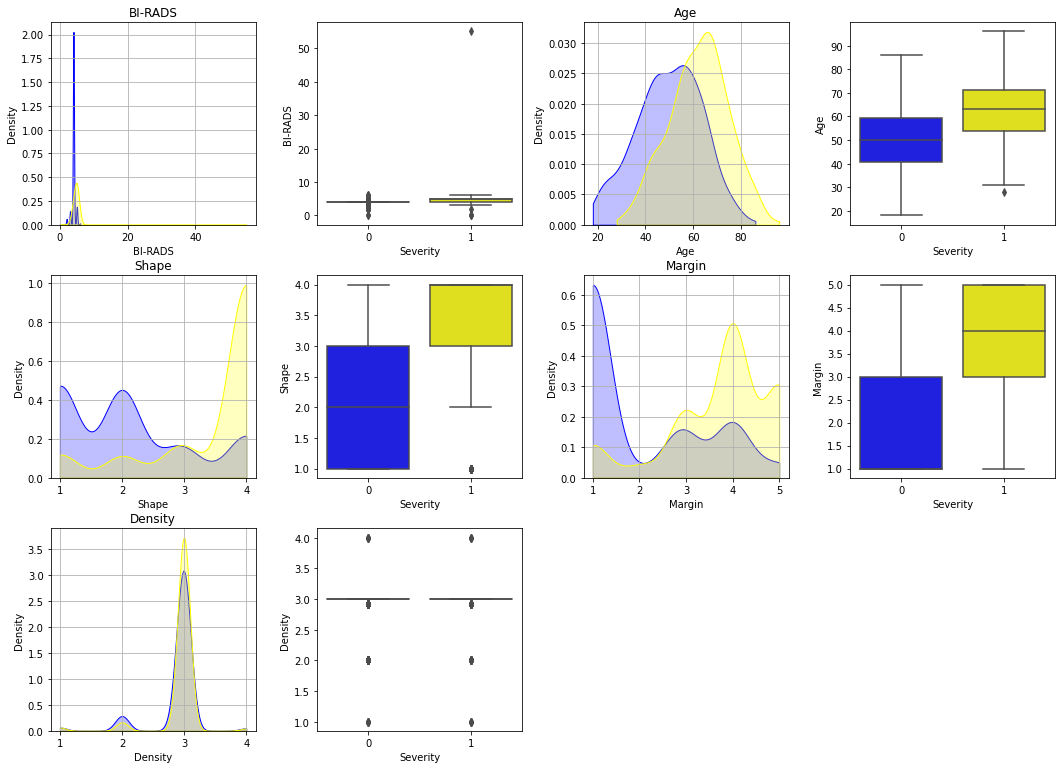

In [ ]:
features = data_train.iloc[:,:5].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Severity"]==0, col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Severity"]==1, col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Severity", palette = ["blue", "yellow"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:5].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(9)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.7960481099656358


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(9)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.7981421821305843


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(9)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.7783290378006873


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(9)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.7783290378006873


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=9)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.7971005154639175


#Vehicle

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/vehicle.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

   Class  count
0   bus     218
1   saab    217
2   opel    212
3   van     199


In [ ]:
np.unique(np.array(data_train['Class']))

array([' bus ', ' opel', ' saab', ' van '], dtype=object)

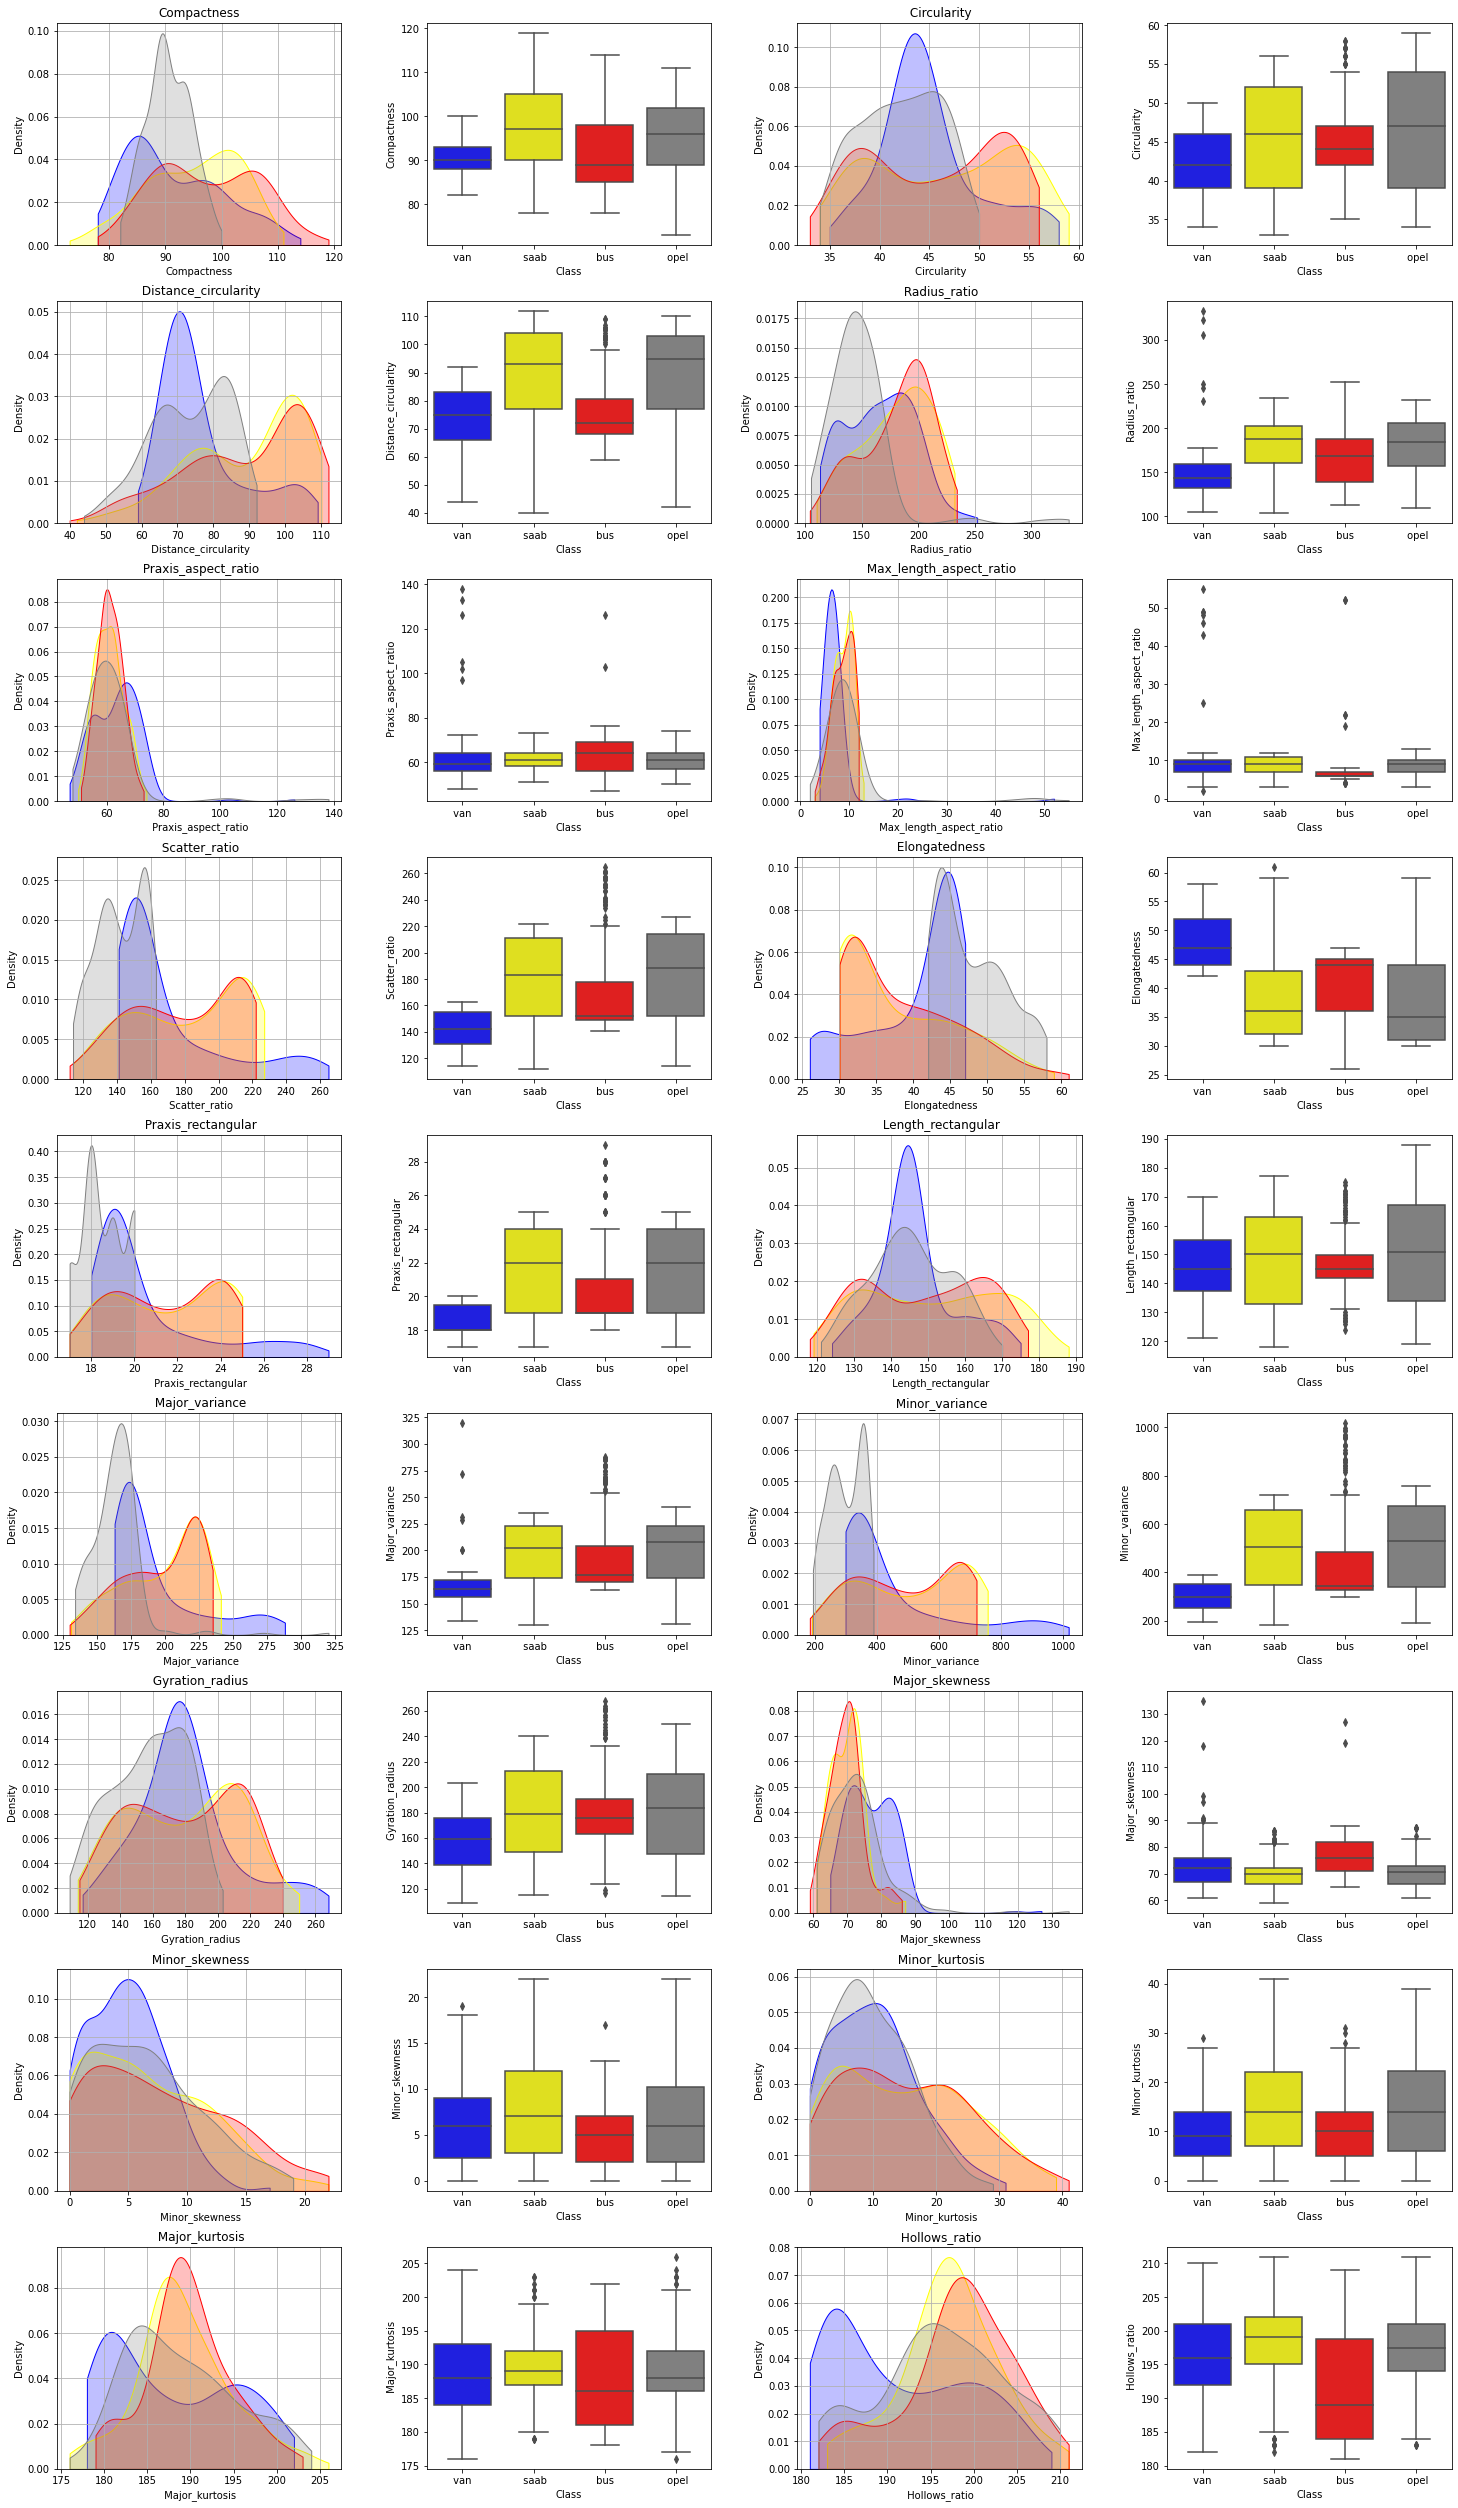

In [ ]:
features = data_train.iloc[:,:18].columns.tolist()
plt.figure(figsize=(25, 45))

for i, col in enumerate(features):
    plt.subplot(9, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]==' bus ', col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==' opel', col], label="dead",  color = "yellow", shade=True,  cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==' saab', col], label="dead",  color = "red", shade=True,  cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==' van ', col], label="dead",  color = "grey", shade=True,  cut=0)

    plt.subplot(9, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow","red", "grey"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:18].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(7)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 2, 4, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.7494397759103641


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(7)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 2, 4, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.6987114845938376


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(7)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.7046218487394957


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(7)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))


Mean Accuracy:  0.7046218487394957


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=7)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.6963445378151261


# Ionosphere

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/ionosphere.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

  Class  count
0     g    225
1     b    126


In [ ]:
np.unique(np.array(data_train['Class']))

array([0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



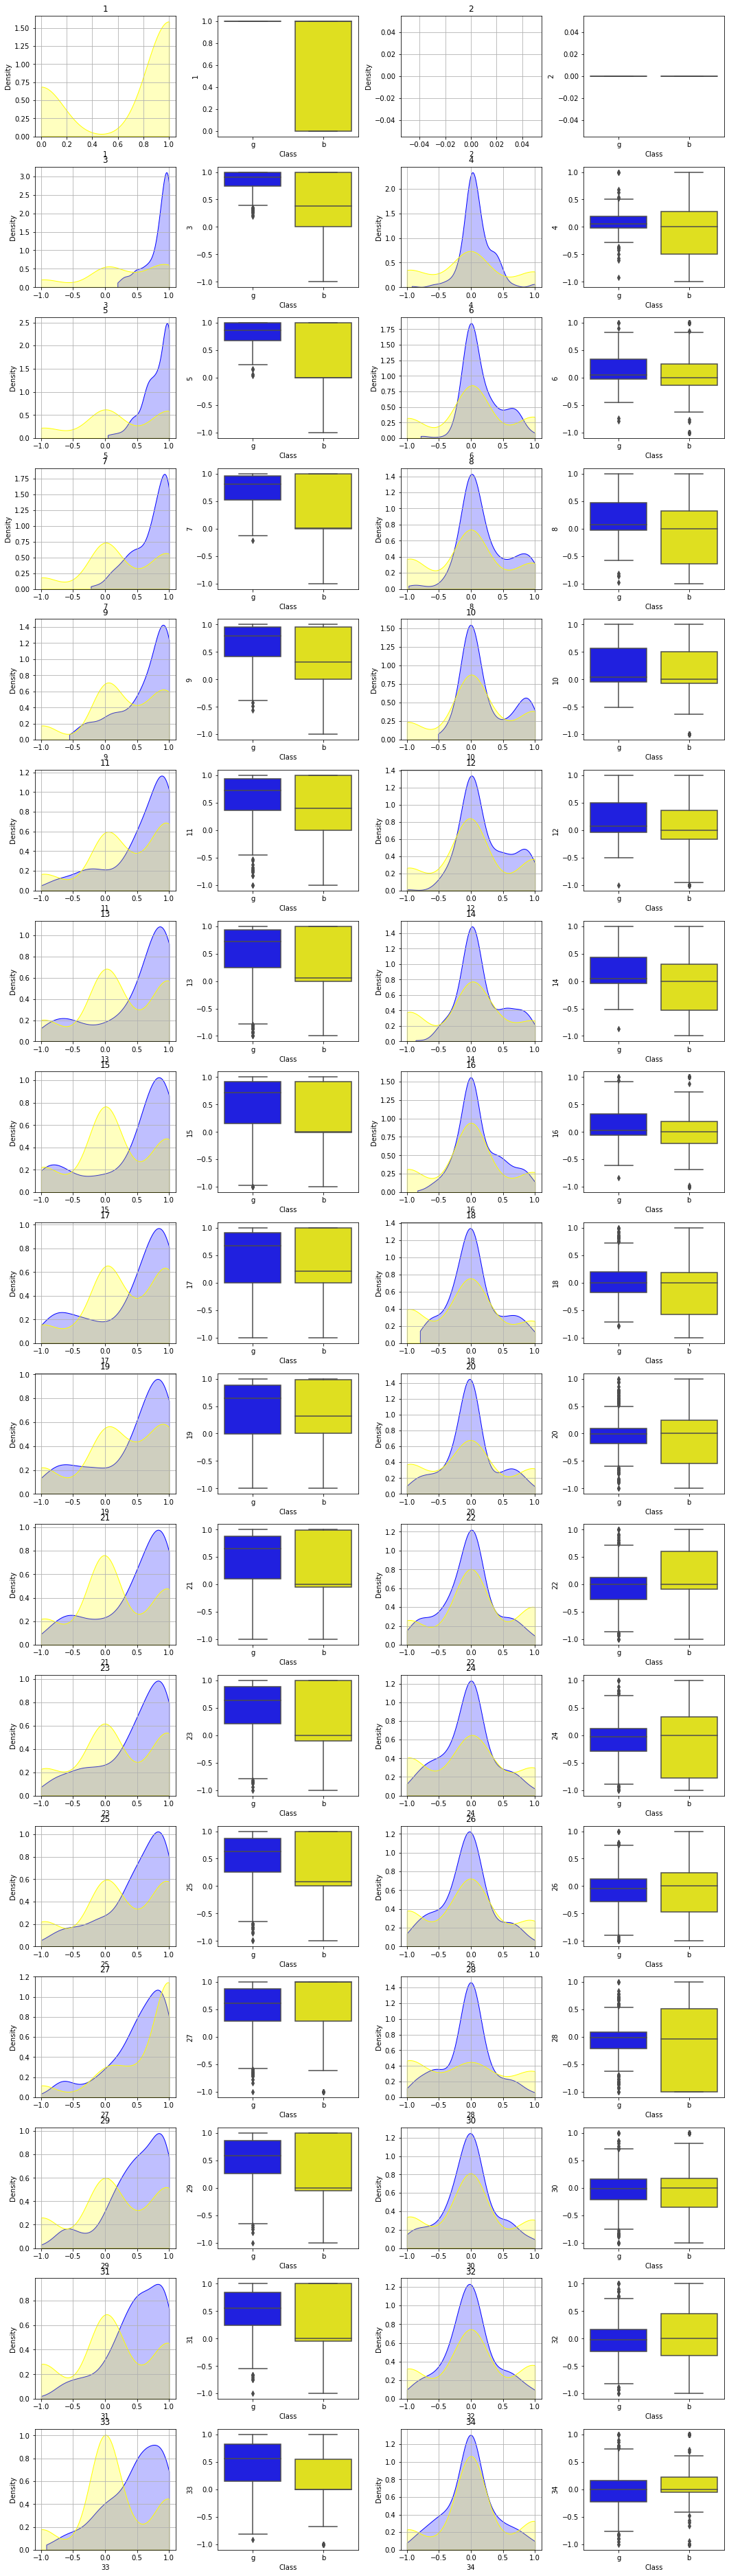

In [ ]:
features = data_train.iloc[:,:34].columns.tolist()
plt.figure(figsize=(18, 80))

for i, col in enumerate(features):
    plt.subplot(20, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]=='g', col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]=='b', col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(20, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:34].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(7)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.9459523809523809


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(7)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.8434126984126984


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(7)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.8491269841269841


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(7)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.8491269841269841


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=7)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.8434126984126984


# Ecoli 2 (5.46)

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/ecoli2.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,negative
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,negative
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,negative
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,negative
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,negative


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

       Class  count
0   negative    284
1   positive     52


In [ ]:
np.unique(np.array(data_train['Class']))

array([' negative', ' positive'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



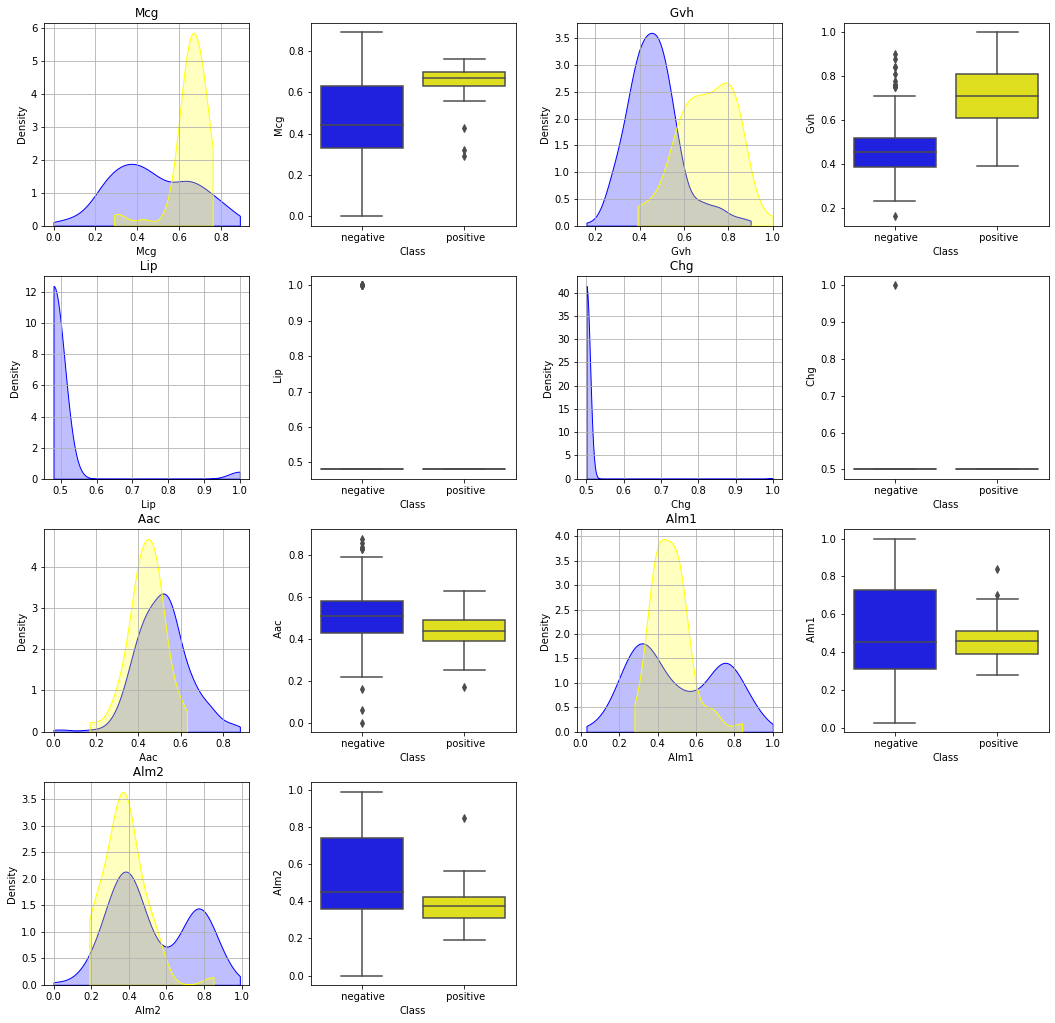

In [ ]:
features = data_train.iloc[:,:7].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]==' negative', col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==' positive', col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:7].to_numpy()

In [ ]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(fitur_train)
# fitur_train_normalize = scaler.transform(fitur_train)
fitur_train_normalize = fitur_train.copy()

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(7)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.9522281639928698


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(7)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.9521390374331551


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(7)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.955169340463458


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(7)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.955169340463458


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=7)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.9521390374331551


#Glass

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/glass6.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0,0.1224,negative
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0,0.0000,negative
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0,0.0000,negative
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0,0.0000,negative
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0,0.0561,negative


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

       Class  count
0   negative    185
1   positive     29


In [ ]:
np.unique(np.array(data_train['Class']))

array([' negative', ' positive'], dtype=object)

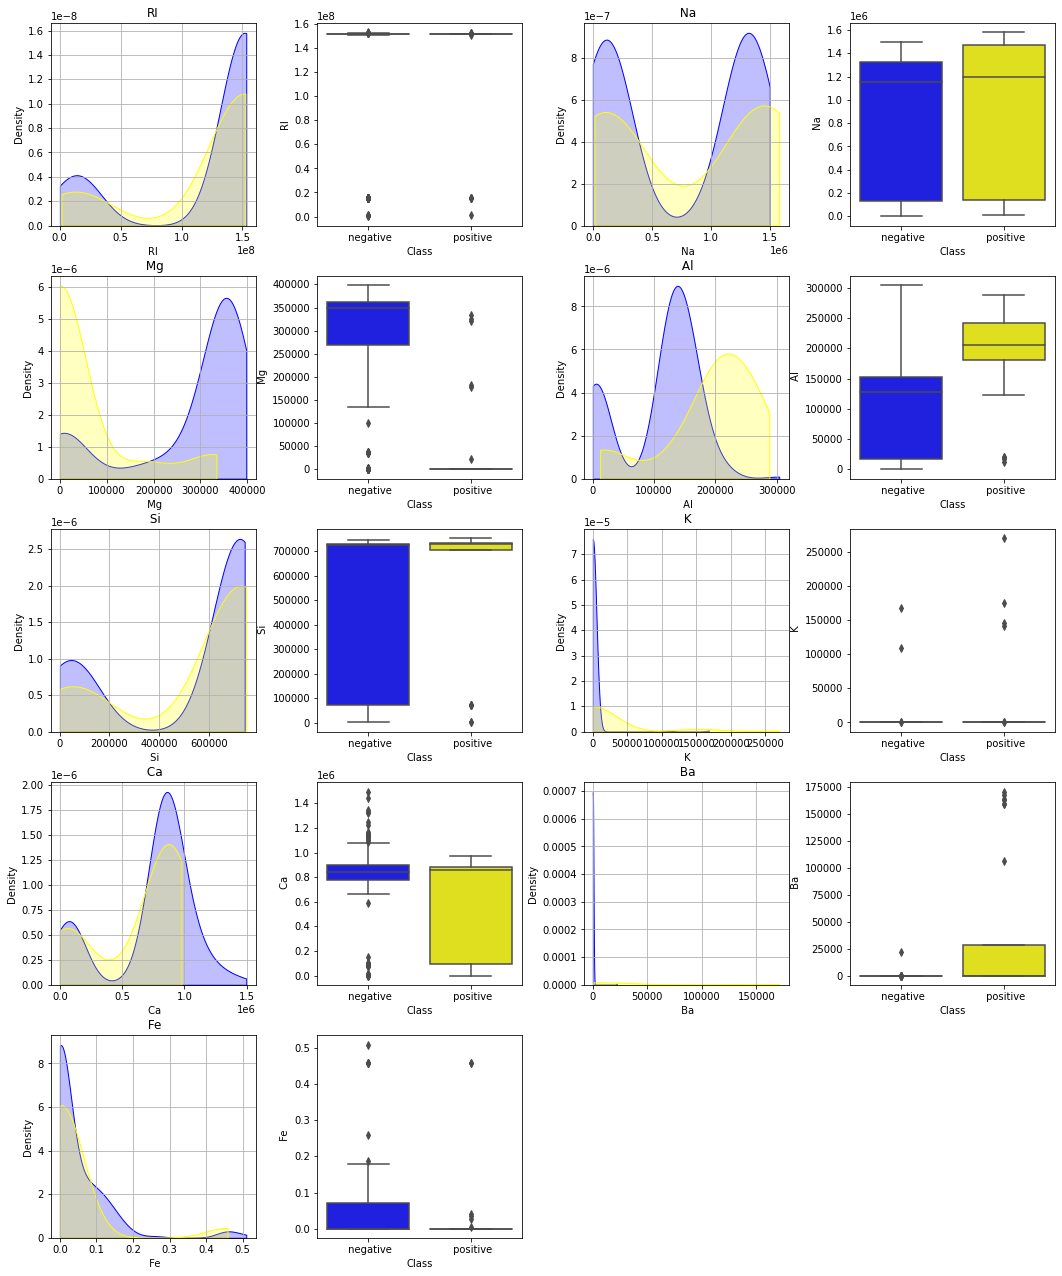

In [ ]:
features = data_train.iloc[:,:9].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]==' negative', col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==' positive', col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:9].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(5)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNCN.append(prediction)

print('Rata-rata Accuracy: ', np.mean(rataBMFKNCN))

Rata-rata Accuracy:  0.9207792207792208


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(5)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNN.append(prediction)
  
print('Rata-rata Accuracy: ', np.mean(rataBMFKNN))

Rata-rata Accuracy:  0.8735930735930735


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(5)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Rata-rata Accuracy: ', np.mean(rataFKNCN))

##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(5)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Rata-rata Accuracy: ', np.mean(accuracyFKNN))

Rata-rata Accuracy:  0.8924242424242423


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=5)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Rata-rata Accuracy: ', np.mean(rata))

Rata-rata Accuracy:  0.8735930735930735


#Wine

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/wine.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

   Class  count
0      2     71
1      1     59
2      3     48


In [ ]:
np.unique(np.array(data_train['Class']))

array([1, 2, 3])

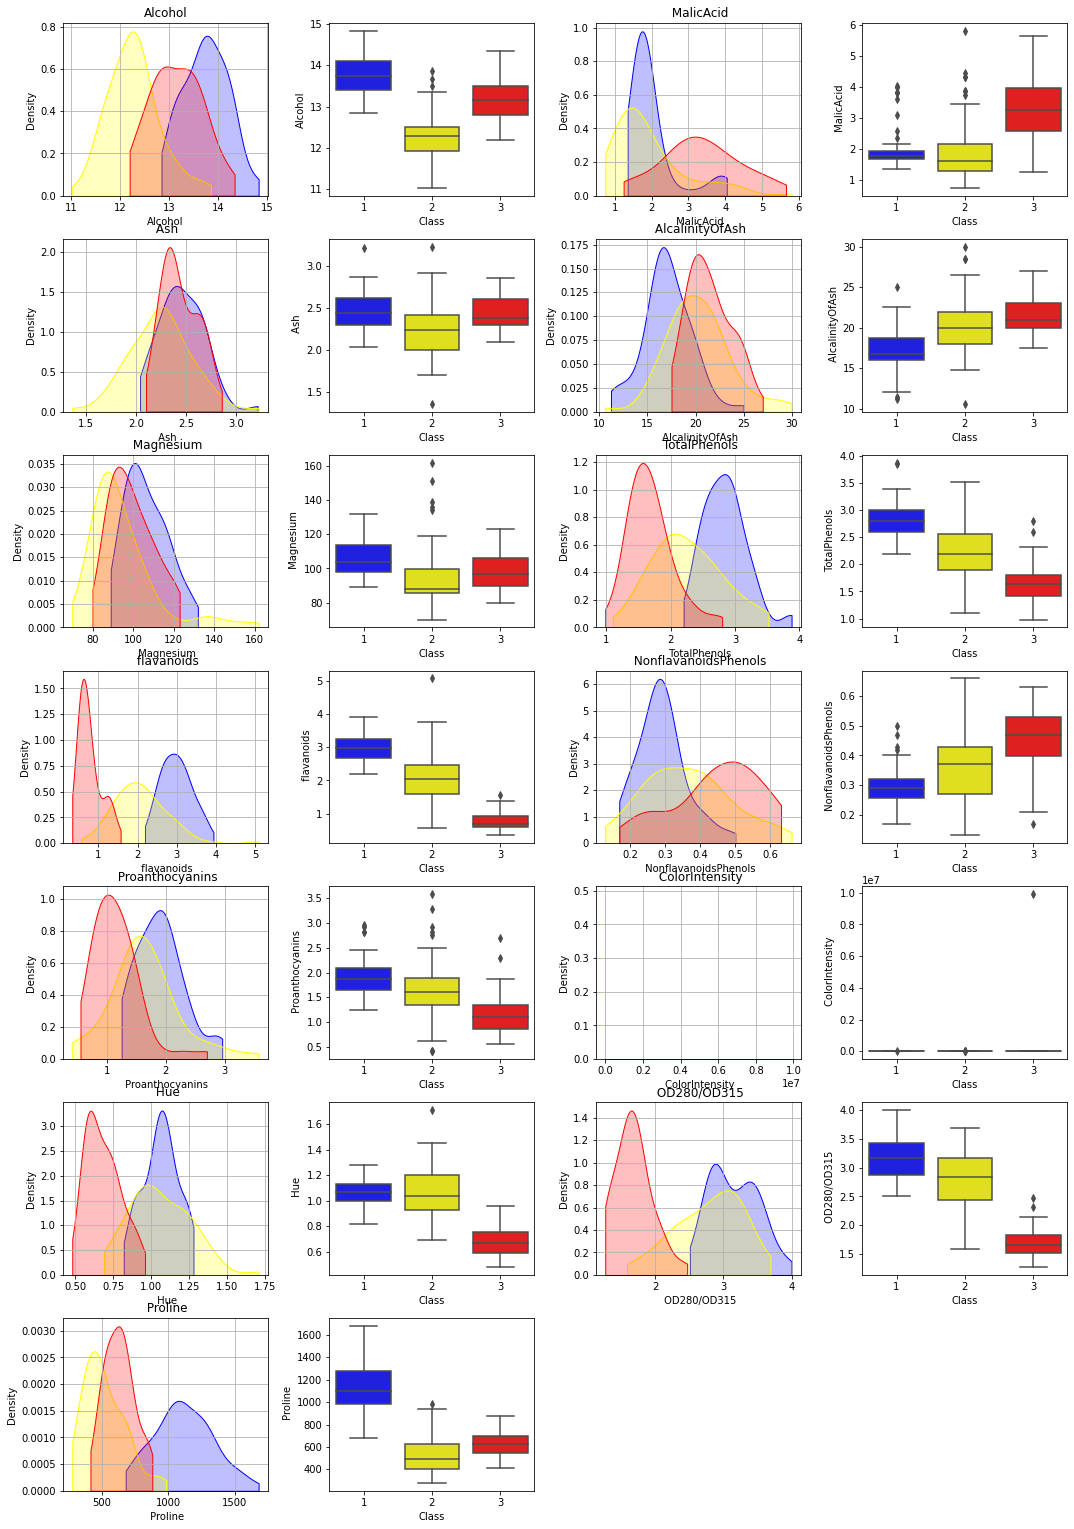

In [ ]:
features = data_train.iloc[:,:13].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(7, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]==1, col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==2, col], label="dead",  color = "yellow", shade=True,  cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==3, col], label="dead",  color = "red", shade=True,  cut=0)

    plt.subplot(7, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow","red"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:13].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(9)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 3, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.9833333333333332


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(9)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 3, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.95


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(9)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.961111111111111


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(9)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.961111111111111


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=9)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.95


#Iris

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/iris.csv'
data_train = pd.read_csv(train_path)
data_train.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

             Class  count
0      Iris-setosa     40
1  Iris-versicolor     40
2   Iris-virginica     40


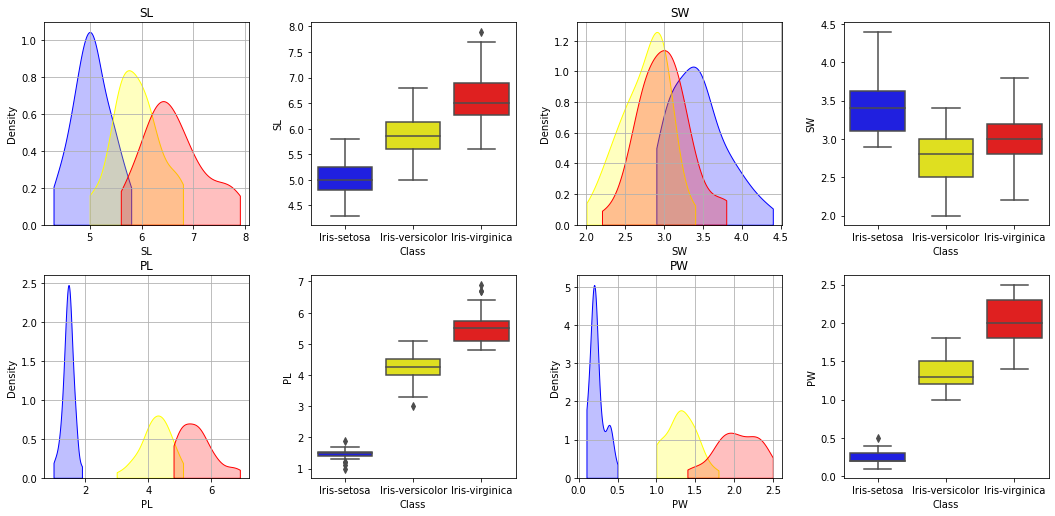

In [ ]:
features = data_train.iloc[:,:4].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]=='Iris-setosa', col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]=='Iris-versicolor', col], label="dead",  color = "yellow", shade=True,  cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]=='Iris-virginica', col], label="dead",  color = "red", shade=True,  cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow","red"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:4].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(8)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 4, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.9666666666666666


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(8)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 4, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.9583333333333333


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(8)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.95


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(8)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.95


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=8)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.9583333333333333


#Appendicitis

In [ ]:
train_path = r'drive/My Drive/Colab Notebooks/Dataset/Dataset Final Project DatMing/appendicitis.xlsx'
data_train = pd.read_excel(train_path)
data_train.head()

,At1,At2,At3,At4,At5,At6,At7,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

countClass = data_train['Class'].value_counts().reset_index()
countClass.columns = ['Class', 'count']
print(countClass)

fig = px.pie(
    countClass, 
    values='count', 
    names="Class", 
    title='Class Distribution', 
    width=700, 
    height=500
)

fig.show()

   Class  count
0      0     85
1      1     21


In [ ]:
np.unique(np.array(data_train['Class']))

array([0, 1])

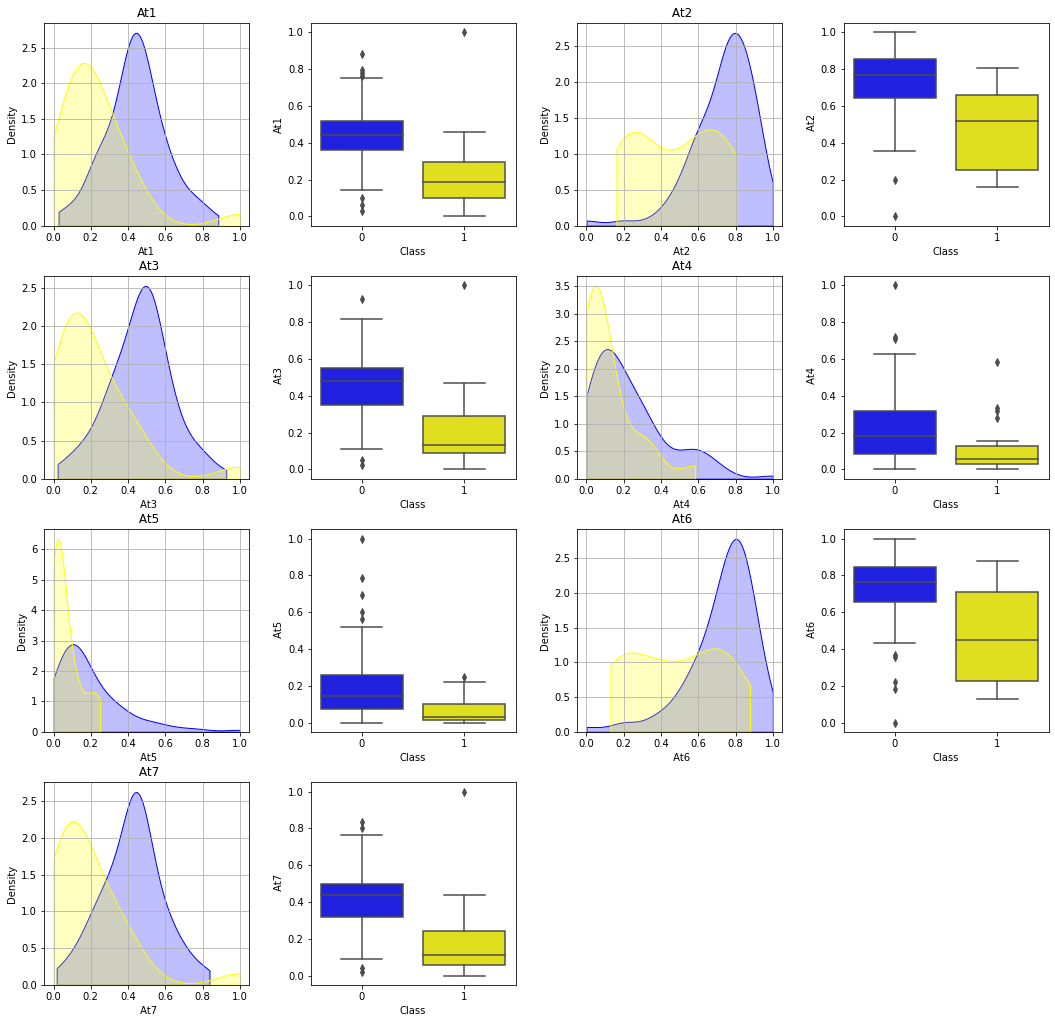

In [ ]:
features = data_train.iloc[:,:7].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data_train.loc[data_train["Class"]==0, col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(data_train.loc[data_train["Class"]==1, col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data_train, x="Class", palette = ["blue", "yellow"]) 

In [ ]:
label_train = data_train.iloc[:,-1].to_numpy()
fitur_train = data_train.iloc[:,:7].to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(fitur_train)
fitur_train_normalize = scaler.transform(fitur_train)

##BM-FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNCN=[]
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfkncn = BM_FKNCN(5)
  bmfkncn.fit(X_train, y_train)
  prediction = bmfkncn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNCN.append(prediction)

print('Mean Accuracy: ', np.mean(rataBMFKNCN))

Mean Accuracy:  0.8663636363636362


##BM-FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataBMFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  bmfknn = BM_FKNN(5)
  bmfknn.fit(X_train, y_train)
  prediction = bmfknn.score(X_test, y_test, 1, 1, 2)
  rataBMFKNN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataBMFKNN))

Mean Accuracy:  0.8581818181818182


##FKNCN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

rataFKNCN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fkncn = FKNCN(5)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.8390909090909091


##FKNN

In [ ]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)

accuracyFKNN = []
for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  fknn = FKNN(5)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.8390909090909091


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(fitur_train_normalize)
rata = []

for train_index, test_index in kf.split(fitur_train_normalize):
  X_train, X_test = fitur_train_normalize[train_index], fitur_train_normalize[test_index]
  y_train, y_test = label_train[train_index], label_train[test_index]

  neigh = KNeighborsClassifier(n_neighbors=5)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.8581818181818182
